In [105]:
import openpyxl
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.datasets import load_iris
sns.set()

In [106]:
import warnings
warnings.simplefilter("ignore")

## Importing data

In [107]:
# Đọc dữ liệu từ hai file CSV
df_application_record = pd.read_csv('application_record.csv')
df_credit_record = pd.read_csv('credit_record.csv')

In [108]:
df_application_record['FLAG_MOBIL'].value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [109]:
#Hiển thị danh sách thông tin 10 dòng dữ liệu application_record
df_application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [110]:
#Hiển thị danh sách thông tin 10 dòng dữ liệu credit_record
df_credit_record[:10]

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [111]:
print('Số lượng missing data trong tập application_record: \n')
print(df_application_record.isnull().sum())
print("------------------------------------------")
print('Số lượng missing data trong tập credit_record: \n')
print(df_credit_record.isnull().sum())

Số lượng missing data trong tập application_record: 

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64
------------------------------------------
Số lượng missing data trong tập credit_record: 

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [112]:
print("Số giá trị STATUS trong credit_cord: \n",df_credit_record["STATUS"].value_counts())

Số giá trị STATUS trong credit_cord: 
 C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64


In [113]:
#C: Không có nợ trong tháng đó
#X: Không có thông tin trong tháng đó
#0: Thanh toán đầy đủ trong tháng đó
#1: Trễ hạn thanh toán từ 1 đến 29 ngày
#2: Trễ hạn thanh toán từ 30 đến 59 ngày
#3: Trễ hạn thanh toán từ 60 đến 89 ngày
#4: Trễ hạn thanh toán từ 90 ngày trở lên
# Thay đổi giá trị cột status thành 1 và 0. Trong đó 1 là được phát hành thẻ tín dụng, 0 là không phát hành thẻ tín dụng
df_credit_record["STATUS"] = df_credit_record["STATUS"].replace( {'C' : '1','X' : '1','0': '1','1' : '0', '2' : '0',
              '3' : '0',
              '4' : '0',
              '5' : '0'})

df_credit_record

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1
...,...,...,...
1048570,5150487,-25,1
1048571,5150487,-26,1
1048572,5150487,-27,1
1048573,5150487,-28,1


In [114]:
print("Hiển thị kiểu dữ liệu trong credit_record \n",df_credit_record.dtypes)
# Đổi kiểu dữ liệu của cột STATUS thành int
df_credit_record['STATUS'] = df_credit_record['STATUS'].astype(int)
print("Hiển thị kiểu dữ liệu trong credit_record sau khi được thay đổi \n",df_credit_record.dtypes)

Hiển thị kiểu dữ liệu trong credit_record 
 ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object
Hiển thị kiểu dữ liệu trong credit_record sau khi được thay đổi 
 ID                int64
MONTHS_BALANCE    int64
STATUS            int32
dtype: object


In [115]:
df_credit_record = df_credit_record.drop('MONTHS_BALANCE', axis=1).drop_duplicates(['ID'])
print("Hiển thị dữ liệu sau khi xóa cột MONTHS_BALANCE trong credit record và giữ lại ID duy nhất \n", df_credit_record)

Hiển thị dữ liệu sau khi xóa cột MONTHS_BALANCE trong credit record và giữ lại ID duy nhất 
               ID  STATUS
0        5001711       1
4        5001712       1
23       5001713       1
45       5001714       1
60       5001715       1
...          ...     ...
1048494  5150482       1
1048512  5150483       1
1048530  5150484       1
1048543  5150485       1
1048545  5150487       1

[45985 rows x 2 columns]


In [116]:
df_credit_record['STATUS'].value_counts()

1    45520
0      465
Name: STATUS, dtype: int64

In [117]:
#Điều chỉnh bộ dữ liệu để tạo ra các ID nhất quán
df_application_record = df_application_record[df_application_record['ID'].isin(df_credit_record['ID'])]
df_credit_record = df_credit_record[df_credit_record['ID'].isin(df_application_record['ID'])]
print("Số lượng ID mới trong application_record", df_application_record['ID'].nunique())
print("Số lượng ID mới trong credit_record", df_credit_record['ID'].nunique())

Số lượng ID mới trong application_record 36457
Số lượng ID mới trong credit_record 36457


In [118]:
df_application_record
df_credit_record

,ID,STATUS
92938,5008804,1
92954,5008805,1
92969,5008806,1
92999,5008808,1
93004,5008809,1
...,...,...
1048494,5150482,1
1048512,5150483,1
1048530,5150484,1
1048543,5150485,1


### Ghép bộ dữ liệu

In [119]:
application_detail = pd.merge(df_application_record, df_credit_record, how='inner', on=['ID'])

In [120]:
application_detail.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
STATUS                   int32
dtype: object

In [121]:
application_detail


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0


## Phân tích các thuộc tính theo giới tính

In [122]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_detail[feature], hue='CODE_GENDER' , data=application_detail)
        plt.legend(loc='best')
        total = len(application_detail[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

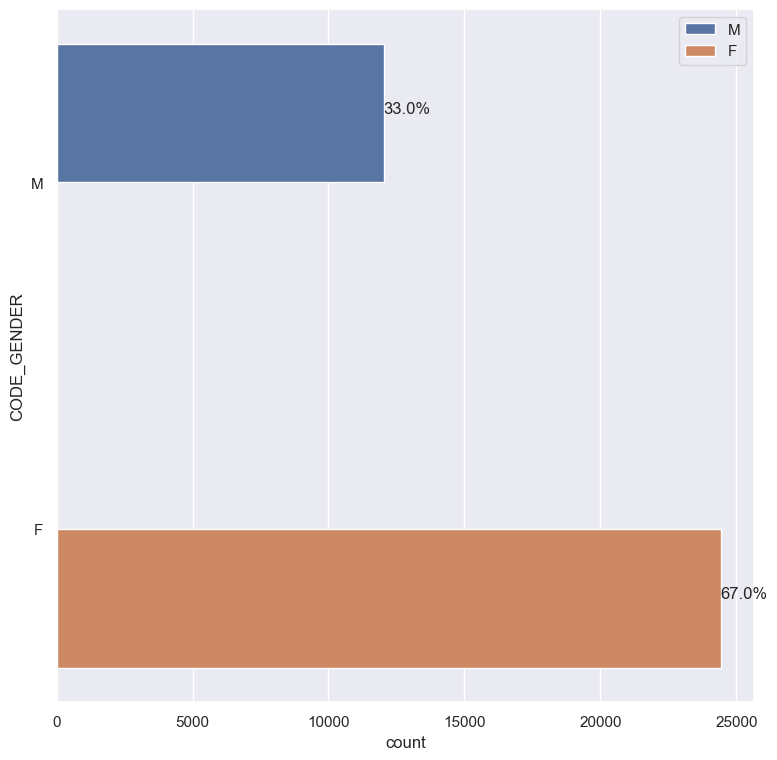

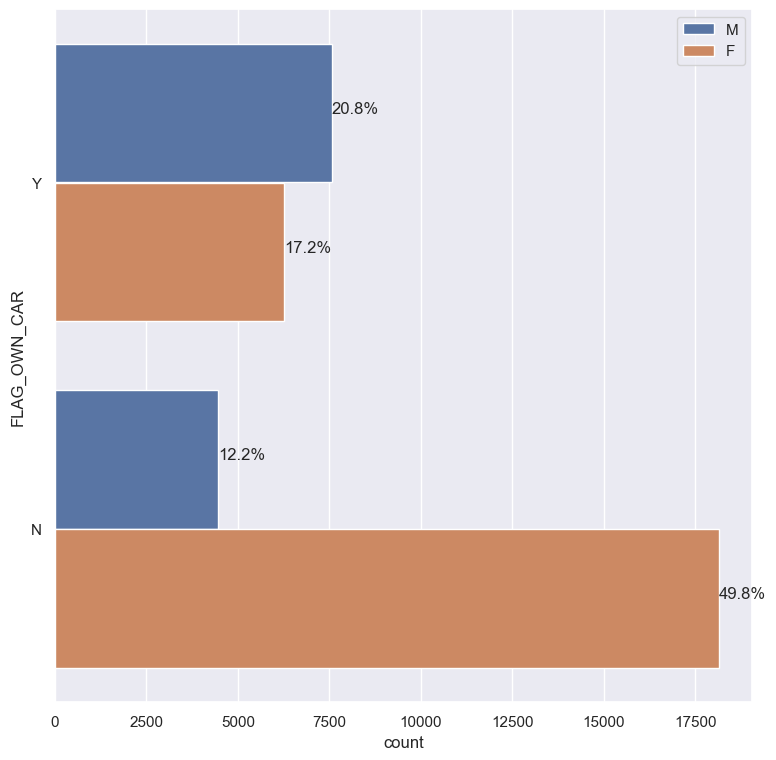

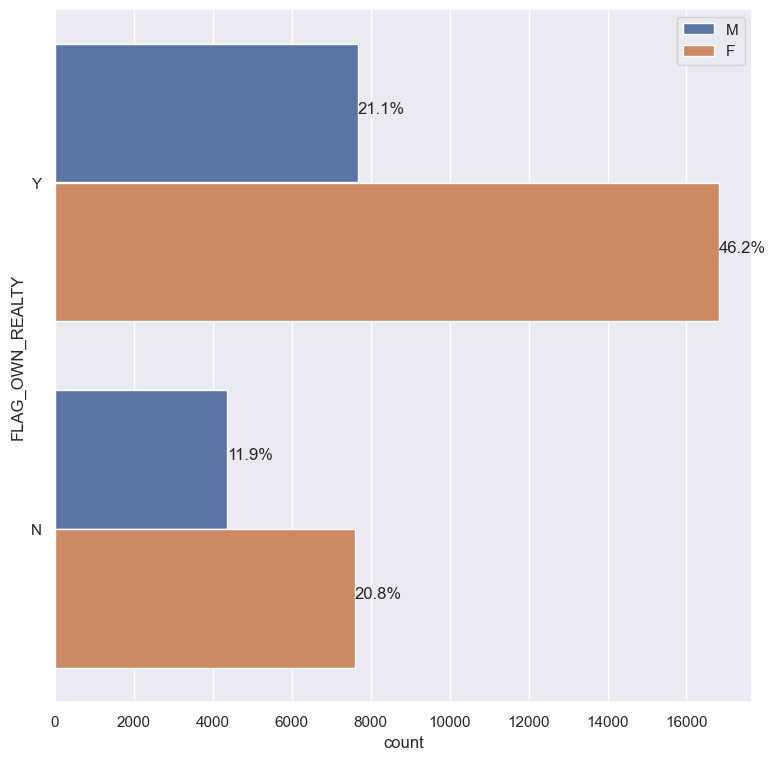

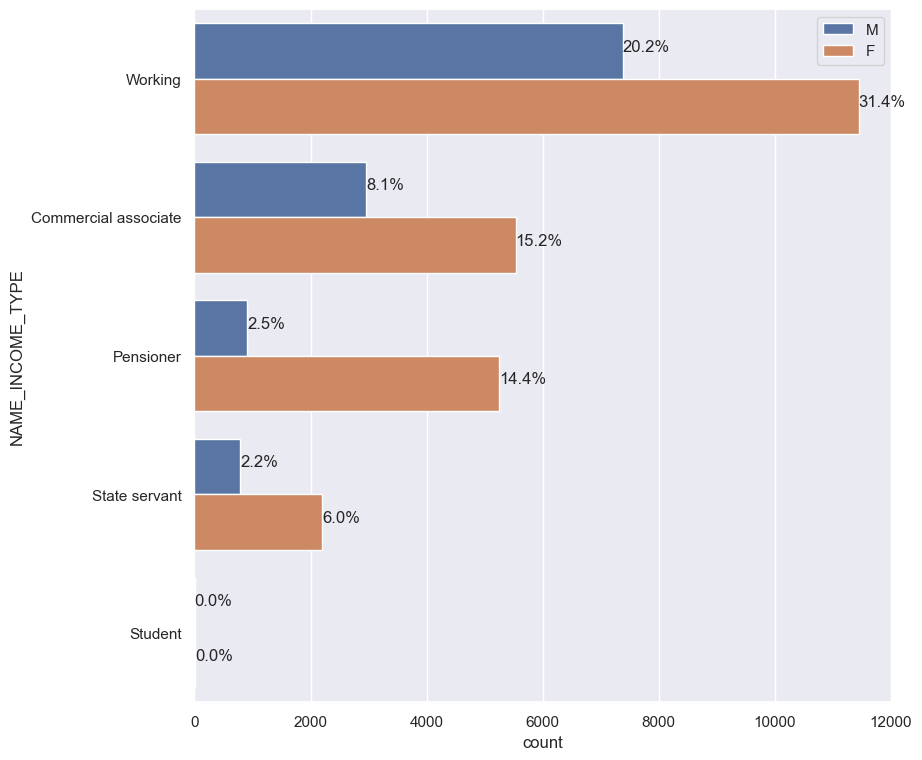

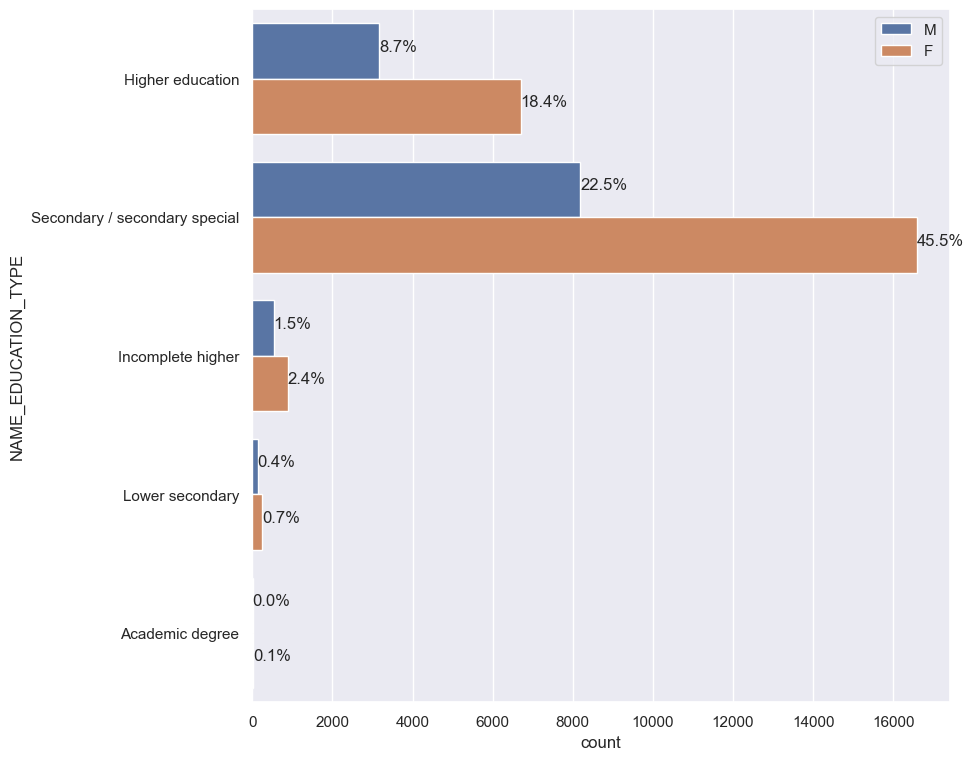

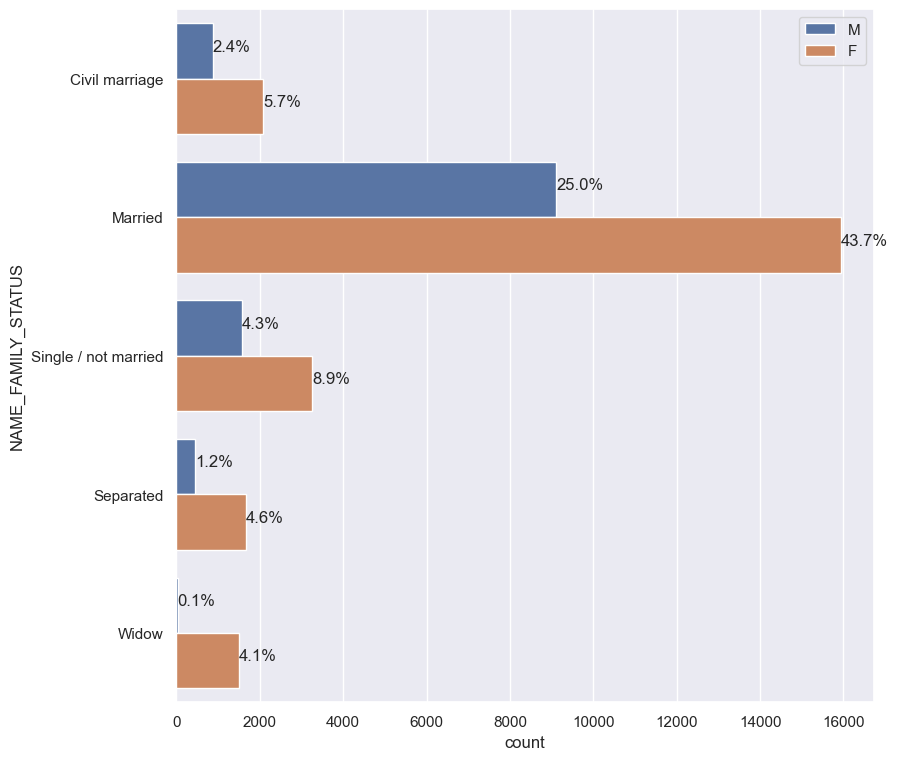

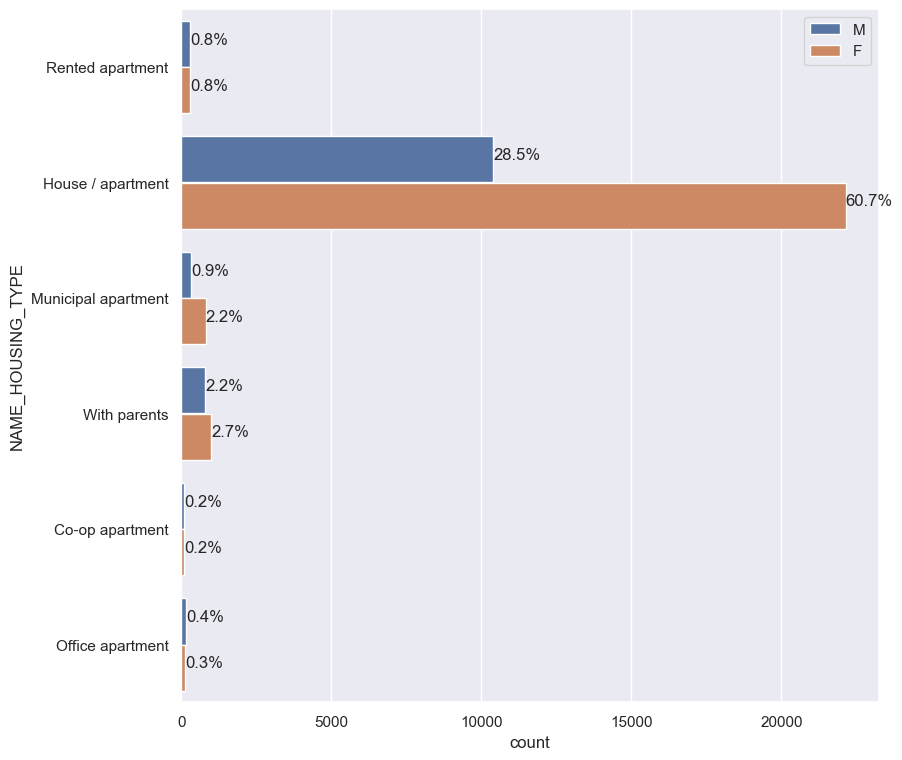

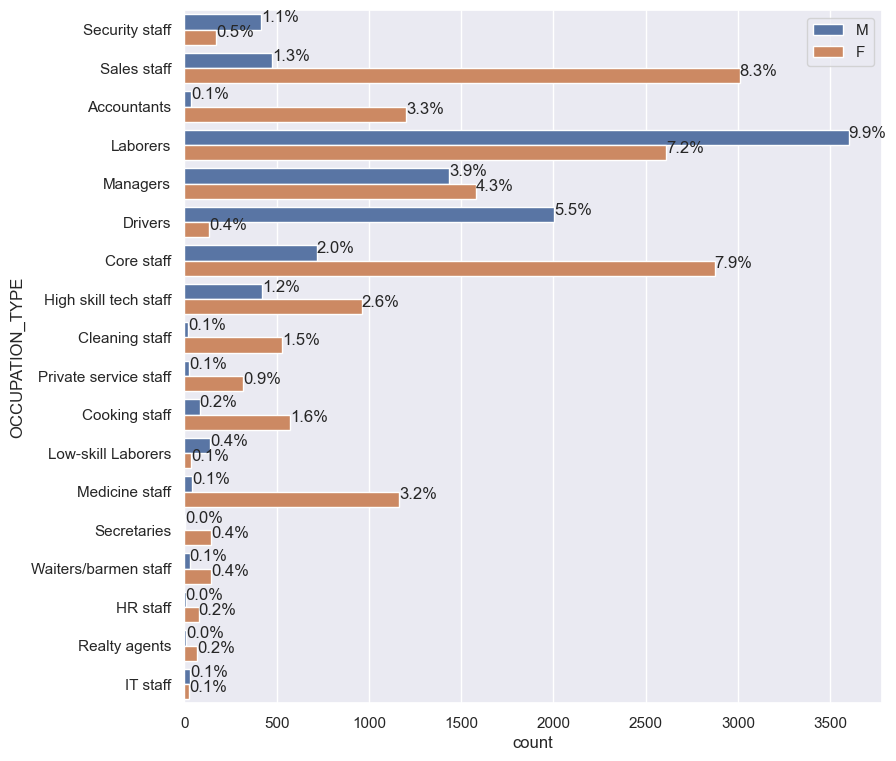

In [123]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

## Tiền xử lý và biến đổi dữ liệu

In [124]:
application_detail.isnull().sum()

ID                         0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
DAYS_BIRTH                 0
DAYS_EMPLOYED              0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
STATUS                     0
dtype: int64

##### Có 12524 giá trị thuộc tính nghề nghiệp bị thiếu, không thể xóa các bản ghi này đi. Vì vậy, ta sẽ điền các giá trị thiếu bằng cách tìm ra các nghề nghiệp được làm nhiều nhất theo giới tính và trình độ học vấn rồi điền vào giá trị trống

## Xác định mối tương quan giữa nghề nghiệp và trình độ học vấn

In [125]:
def countplot_occupation(features):
    for feature in features:
        plt.figure(figsize=(60, 60))
        ax=sns.countplot(y=application_detail[feature], hue='NAME_EDUCATION_TYPE' , data=application_detail)
        plt.legend(loc='best')
        total = len(application_detail[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

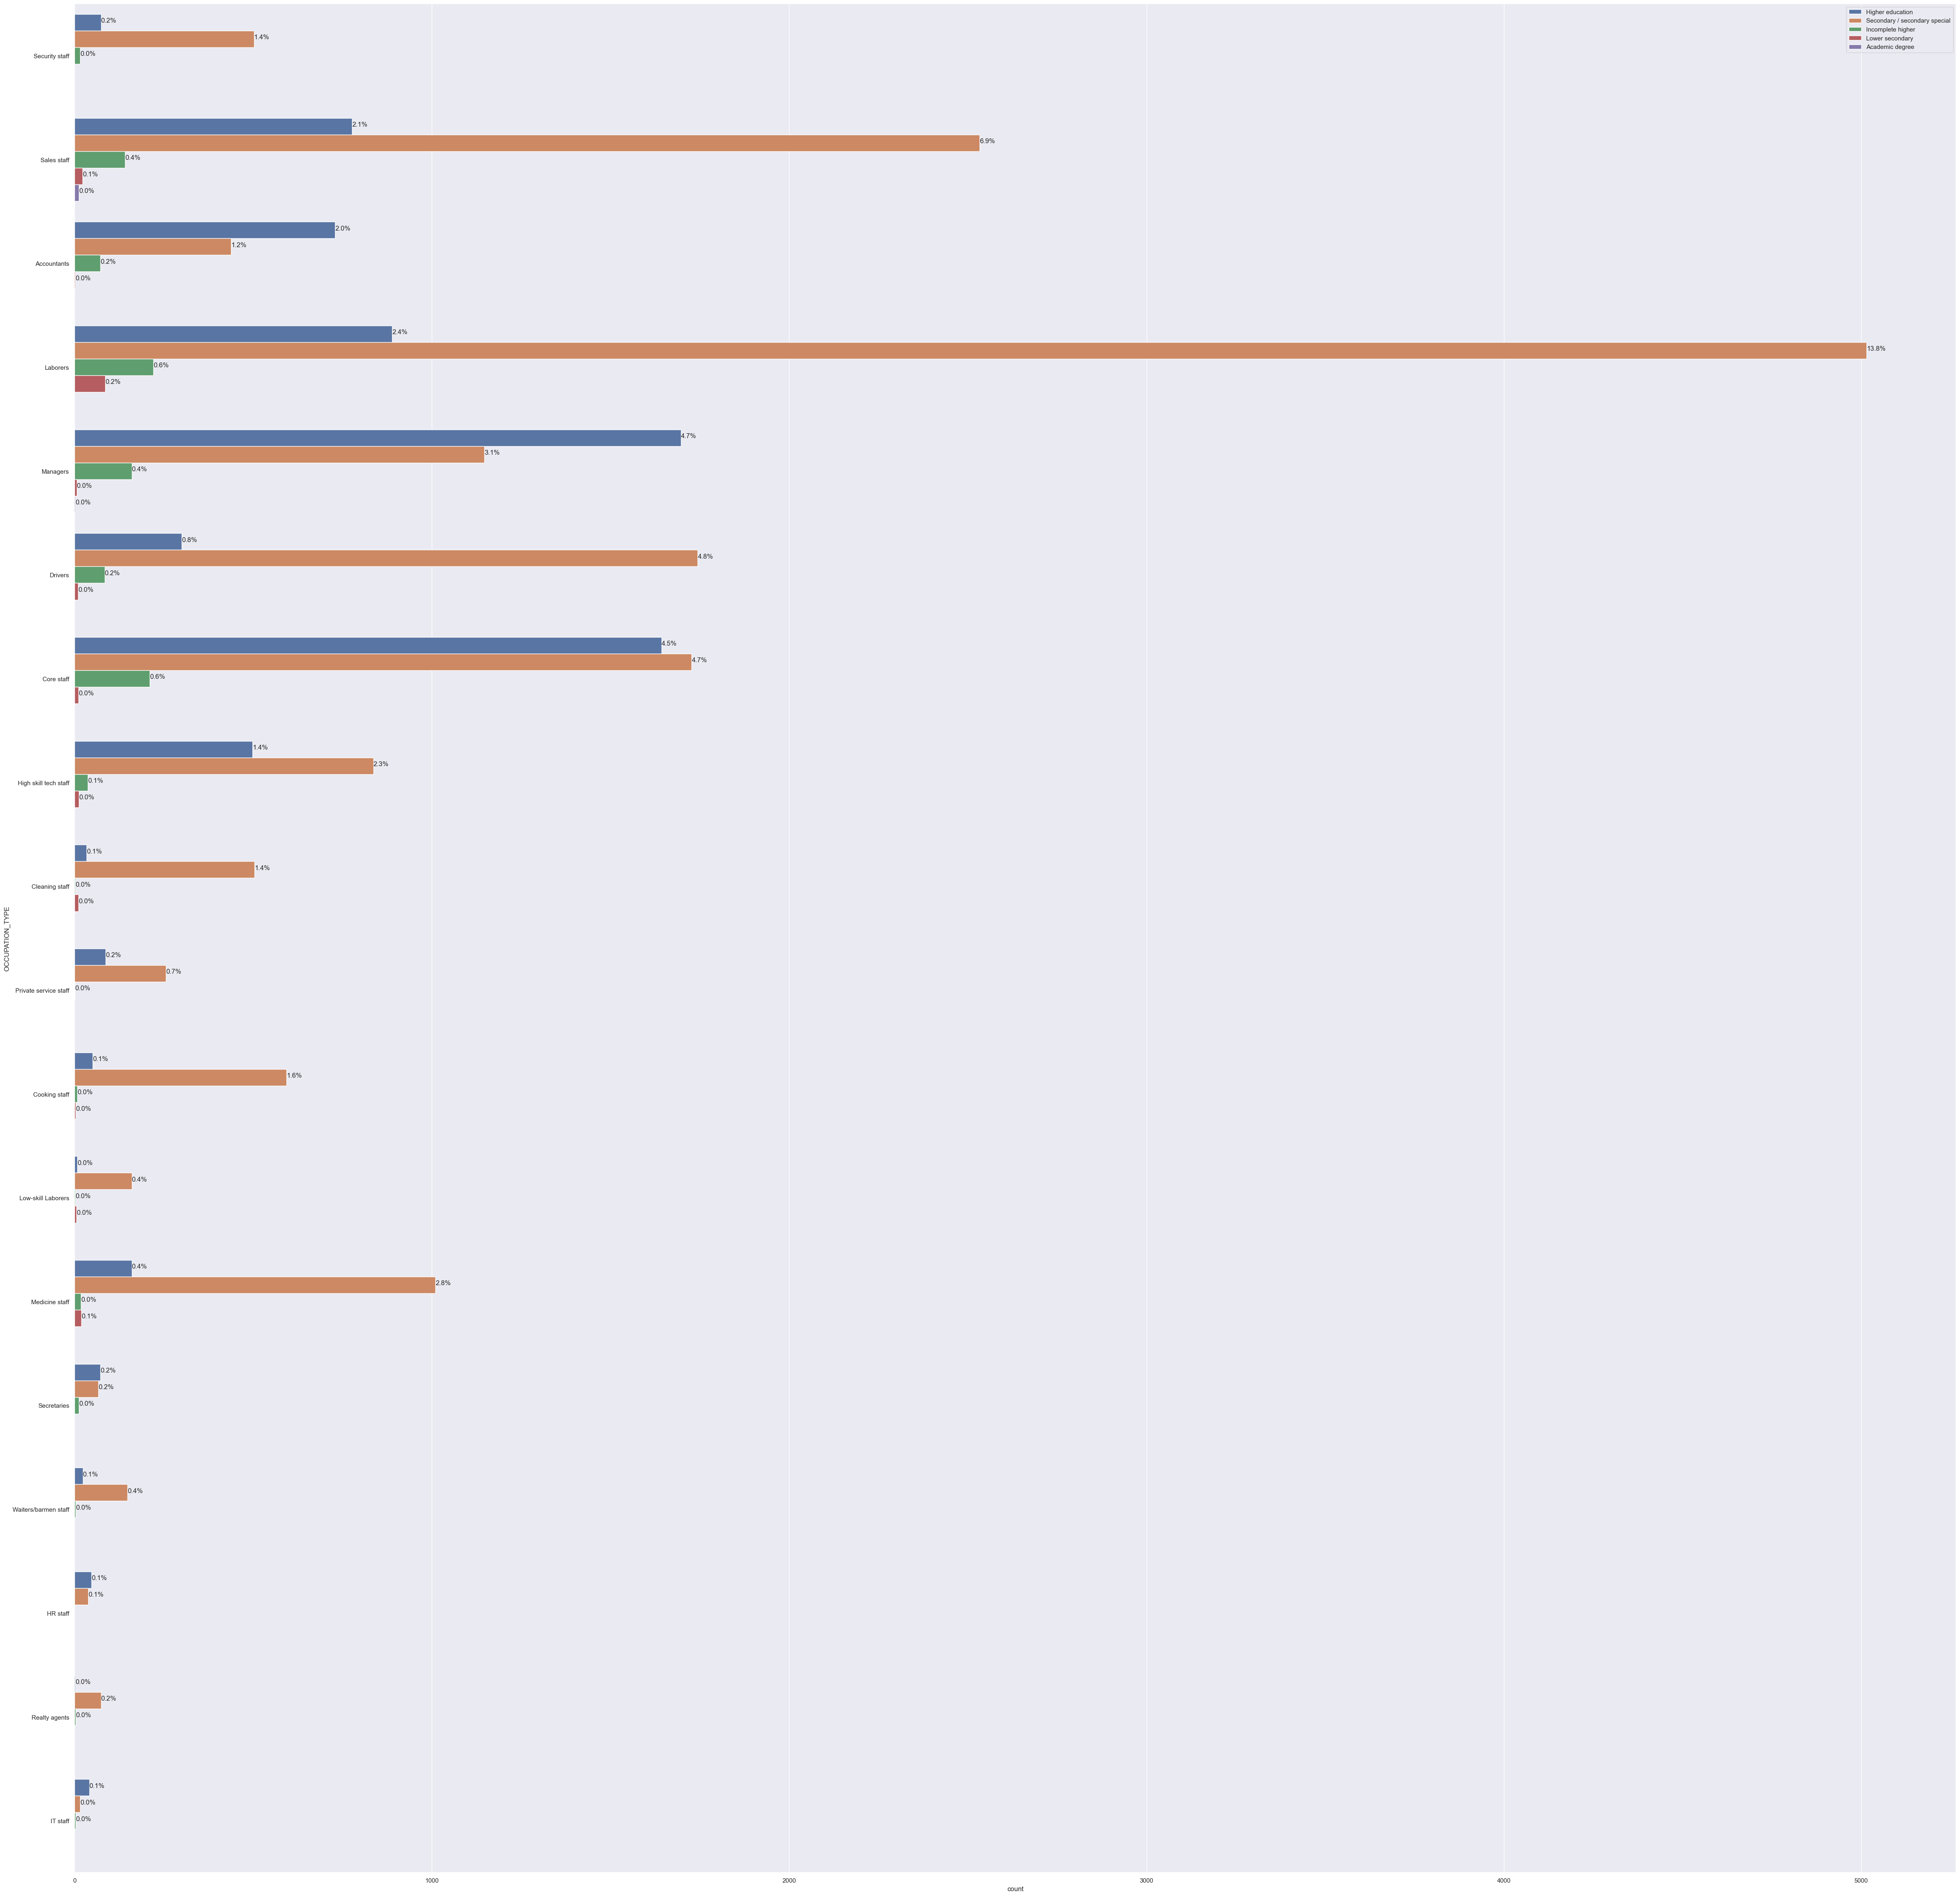

In [126]:
countplot_occupation(['OCCUPATION_TYPE'])

##### Tính tỷ lệ nghề nghiệp được làm theo giới tính và trình độ học vấn

In [127]:
def occupation_by_education_by_gender(occupations, educations, genders, length):
    Gender = []
    Education = []
    Occupation = []
    Percentage = []

    for gender in genders:
        for education in educations:
            for occupation in occupations:
                Gender.append(gender)
                Education.append(education)
                Occupation.append(occupation)

                # Lọc dữ liệu theo các tiêu chí
                temp_df = application_detail[
                    (application_detail['OCCUPATION_TYPE'] == occupation) &
                    (application_detail['CODE_GENDER'] == gender) &
                    (application_detail['NAME_EDUCATION_TYPE'] == education)
                ]
                length_filter = len(temp_df)
                Percentage.append(length_filter / length)

    # Tạo DataFrame từ dữ liệu đã thu thập
    percent_dict = {
        'Gender': Gender,
        'Education': Education,
        'Occupation': Occupation,
        'Popularity Percentage': Percentage
    }

    df = pd.DataFrame(percent_dict)

    # Lưu DataFrame vào một tệp Excel
    df.to_excel('Occupation_popularity_index.xlsx', index=False)

In [128]:
occupation_by_education_by_gender(list(application_detail['OCCUPATION_TYPE'].unique()), list(application_detail['NAME_EDUCATION_TYPE'].unique()), list(application_detail['CODE_GENDER'].unique()), len(application_detail))

In [129]:
occupation_popularity = pd.read_excel('Occupation_popularity_index.xlsx')

## Thay thế các giá trị nghề nghiệp bị thiếu với nghề nghiệp có tỷ lệ được làm cao nhất theo giới tính và trình độ học vấn

In [130]:
occupation_popularity['Tag'] = occupation_popularity['Gender']+ '_' + occupation_popularity['Education']

In [131]:
def create_tag_dict(data):
    # Lấy danh sách các tag duy nhất
    tag_list = list(data['Tag'].unique())

    # Khởi tạo danh sách nghề nghiệp phổ biến
    popular_occupation = []

    # Nhóm dữ liệu theo cột 'Tag'
    data_grouped = data.groupby('Tag')

    # Duyệt qua từng tag
    for tag in tag_list:
        # Lấy dữ liệu của nhóm hiện tại
        grouped_data = data_grouped.get_group(tag)

        # Tìm nghề nghiệp phổ biến nhất trong nhóm
        popular_occupation.append(
            grouped_data.loc[grouped_data['Popularity Percentage'].idxmax()]['Occupation']
        )

    # Tạo từ điển Tag_dict
    Tag_dict = {
        'Tag': tag_list,
        'Occupation': popular_occupation
    }

    return Tag_dict

In [132]:
dict_df = dict(occupation_popularity)

In [133]:
pd.DataFrame(dict_df).to_excel('Tag_vs_Occupation.xlsx', index=False)

In [134]:
tag_data = pd.read_excel('Tag_vs_Occupation.xlsx')

In [135]:
tag_data

,Gender,Education,Occupation,Popularity Percentage,Tag
0,M,Higher education,NaN,0.000000,M_Higher education
1,M,Higher education,Security staff,0.001673,M_Higher education
2,M,Higher education,Sales staff,0.004526,M_Higher education
3,M,Higher education,Accountants,0.000933,M_Higher education
4,M,Higher education,Laborers,0.014620,M_Higher education
...,...,...,...,...,...
185,F,Academic degree,Secretaries,0.000000,F_Academic degree
186,F,Academic degree,Waiters/barmen staff,0.000000,F_Academic degree
187,F,Academic degree,HR staff,0.000000,F_Academic degree
188,F,Academic degree,Realty agents,0.000000,F_Academic degree


In [136]:
tag_g = list(tag_data['Tag'])
occu_g = list(tag_data['Occupation'])
tag_dict = {}
for index in range(len(tag_g)):
    tag_dict[tag_g[index]] = occu_g[index]

In [137]:
tag_dict

{'M_Higher education': 'IT staff',
 'M_Secondary / secondary special': 'IT staff',
 'M_Incomplete higher': 'IT staff',
 'M_Lower secondary': 'IT staff',
 'M_Academic degree': 'IT staff',
 'F_Higher education': 'IT staff',
 'F_Secondary / secondary special': 'IT staff',
 'F_Incomplete higher': 'IT staff',
 'F_Lower secondary': 'IT staff',
 'F_Academic degree': 'IT staff'}

In [138]:
application_detail['Tag'] = application_detail['CODE_GENDER']+ '_' + application_detail['NAME_EDUCATION_TYPE']

In [139]:
def Replace_nan_occupation(df):
    for key in tag_dict:
        if df['Tag'] == key and pd.isnull(df['OCCUPATION_TYPE']):
            df['OCCUPATION_TYPE'] = tag_dict[key]
    return df

In [140]:
application_detail = application_detail.apply(Replace_nan_occupation, axis=1)

In [141]:
len(application_detail)

36457

In [142]:
application_detail

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,Tag
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,IT staff,2.0,1,M_Higher education
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,IT staff,2.0,1,M_Higher education
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,1,M_Secondary / secondary special
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,F_Secondary / secondary special
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1,F_Secondary / secondary special
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,Managers,2.0,0,M_Secondary / secondary special
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,F_Higher education
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,Medicine staff,2.0,1,F_Higher education
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,Sales staff,2.0,0,F_Secondary / secondary special


## Biến đổi các thuộc tính tuổi và năm làm việc về định dạng năm

In [143]:
application_detail.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
STATUS                 0
Tag                    0
dtype: int64

In [144]:
application_detail['AGE'] = np.ceil(pd.to_timedelta(application_detail['DAYS_BIRTH'], unit='D').dt.days / -365.25)

In [145]:
application_detail['AGE']

0        33.0
1        33.0
2        59.0
3        53.0
4        53.0
         ... 
36452    48.0
36453    34.0
36454    34.0
36455    50.0
36456    26.0
Name: AGE, Length: 36457, dtype: float64

In [146]:
application_detail.drop('DAYS_BIRTH', axis=1, inplace=True)
application_detail.loc[(application_detail['DAYS_EMPLOYED'] > 0), 'DAYS_EMPLOYED'] = 0
application_detail['YEARS_EMPLOYED'] = np.ceil(pd.to_timedelta(application_detail['DAYS_EMPLOYED'], unit='D').dt.days / -365.25)
application_detail['YEARS_EMPLOYED']

0        13.0
1        13.0
2         4.0
3         9.0
4         9.0
         ... 
36452     7.0
36453     4.0
36454     4.0
36455     2.0
36456     4.0
Name: YEARS_EMPLOYED, Length: 36457, dtype: float64

In [147]:
application_detail.drop(['DAYS_EMPLOYED', 'Tag'], axis=1, inplace=True)

#### Các thuộc tính cuối cùng

In [148]:
application_detail.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'STATUS', 'AGE', 'YEARS_EMPLOYED'],
      dtype='object')

In [149]:
application_detail.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
STATUS                   int64
AGE                    float64
YEARS_EMPLOYED         float64
dtype: object

#### Thay giá trị ngoại lai bằng giá trị xuất hiện nhiều nhất

In [150]:
mode = application_detail['CNT_CHILDREN'].mode().iloc[0]
# Xác định và thay thế giá trị ngoại lai trong cột 'CNT_CHILDREN' bằng giá trị mode
outliers = application_detail['CNT_CHILDREN'] > 5  # Điều kiện cho giá trị ngoại lai
application_detail.loc[outliers, 'CNT_CHILDREN'] = mode

In [151]:
application_detail['CNT_CHILDREN'].value_counts()

0    25207
1     7492
2     3256
3      419
4       63
5       20
Name: CNT_CHILDREN, dtype: int64

In [152]:
df1 = application_detail
df1.to_csv("nhom9.csv", index=False)

## Mã hóa các giá trị định tính về dạng định lượng từ 0

In [153]:
def Cat_to_Num(features):
    for feature in features:
        feature_list = list(np.unique(application_detail[feature]))
        feature_dict = {}
        for i in range(len(feature_list)):
                       feature_dict[feature_list[i]] = i
        application_detail.replace({feature : feature_dict}, inplace=True)
        print(feature, '-->', feature_dict)

In [154]:
categorical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_EDUCATION_TYPE']
Cat_to_Num(categorical_features)

CODE_GENDER --> {'F': 0, 'M': 1}
FLAG_OWN_CAR --> {'N': 0, 'Y': 1}
FLAG_OWN_REALTY --> {'N': 0, 'Y': 1}
NAME_INCOME_TYPE --> {'Commercial associate': 0, 'Pensioner': 1, 'State servant': 2, 'Student': 3, 'Working': 4}
NAME_FAMILY_STATUS --> {'Civil marriage': 0, 'Married': 1, 'Separated': 2, 'Single / not married': 3, 'Widow': 4}
OCCUPATION_TYPE --> {'Accountants': 0, 'Cleaning staff': 1, 'Cooking staff': 2, 'Core staff': 3, 'Drivers': 4, 'HR staff': 5, 'High skill tech staff': 6, 'IT staff': 7, 'Laborers': 8, 'Low-skill Laborers': 9, 'Managers': 10, 'Medicine staff': 11, 'Private service staff': 12, 'Realty agents': 13, 'Sales staff': 14, 'Secretaries': 15, 'Security staff': 16, 'Waiters/barmen staff': 17}
NAME_HOUSING_TYPE --> {'Co-op apartment': 0, 'House / apartment': 1, 'Municipal apartment': 2, 'Office apartment': 3, 'Rented apartment': 4, 'With parents': 5}
NAME_EDUCATION_TYPE --> {'Academic degree': 0, 'Higher education': 1, 'Incomplete higher': 2, 'Lower secondary': 3, 'Seconda

In [155]:
application_detail.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,1,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
5,5008810,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
6,5008811,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
7,5008812,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0
8,5008813,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0
9,5008814,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0


In [156]:
credit_approval_data = application_detail.drop('ID', axis=1, inplace=False)

In [157]:
credit_approval_data.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
1,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
2,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,1,59.0,4.0
3,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
4,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
5,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
6,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
7,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0
8,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0
9,0,0,1,0,283500.0,1,1,2,1,1,0,0,0,7,1.0,1,62.0,-0.0


In [158]:
credit_approval_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.428258,0.723986,0.0,0.0,0.0,1.0,5.0
AMT_INCOME_TOTAL,36457.0,186685.736662,101789.226482,27000.0,121500.0,157500.0,225000.0,1575000.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


##### Biến đổi các thuộc tính thu nhập, tuổi, năm làm việc theo 3 mức

In [159]:
# Chia giá trị cột Age thành 3 khoảng
a = pd.cut(credit_approval_data['AGE'], 3)
# Hiển thị những khoảng duy nhất
a.unique()

[(20.952, 37.0], (53.0, 69.0], (37.0, 53.0]]
Categories (3, interval[float64, right]): [(20.952, 37.0] < (37.0, 53.0] < (53.0, 69.0]]

In [160]:
# Chia giá trị cột AMT_INCOME_TOTAL thành 3 khoảng
b = pd.cut(credit_approval_data['AMT_INCOME_TOTAL'], 3)
b.unique()

[(25452.0, 543000.0], (543000.0, 1059000.0], (1059000.0, 1575000.0]]
Categories (3, interval[float64, right]): [(25452.0, 543000.0] < (543000.0, 1059000.0] < (1059000.0, 1575000.0]]

In [161]:
# Chia giá trị cột YEARS_EMPLOYED thành 3 khoảng
c = pd.cut(credit_approval_data['YEARS_EMPLOYED'], 3)
c.unique()

[(-0.044, 14.667], (14.667, 29.333], (29.333, 44.0]]
Categories (3, interval[float64, right]): [(-0.044, 14.667] < (14.667, 29.333] < (29.333, 44.0]]

In [162]:
for index,row in credit_approval_data.iterrows():
    if(row['AMT_INCOME_TOTAL']<=543000):
        credit_approval_data._set_value(index,'AMT_INCOME_TOTAL',0)
    elif(row['AMT_INCOME_TOTAL']<=1059000):
        credit_approval_data._set_value(index,'AMT_INCOME_TOTAL',1)
    else:
        credit_approval_data._set_value(index,'AMT_INCOME_TOTAL',2)

In [163]:
for index,row in credit_approval_data.iterrows():
    if(row['YEARS_EMPLOYED']<=15):
        credit_approval_data._set_value(index,'YEARS_EMPLOYED',0)
    elif(row['YEARS_EMPLOYED']<=30):
        credit_approval_data._set_value(index,'YEARS_EMPLOYED',1)
    else:
        credit_approval_data._set_value(index,'YEARS_EMPLOYED',2)

In [164]:
for index,row in credit_approval_data.iterrows():
    if(row['AGE']<=37):
        credit_approval_data._set_value(index,'AGE',0)
    elif(row['AGE']<=53):
        credit_approval_data._set_value(index,'AGE',1)
    else:
        credit_approval_data._set_value(index,'AGE',2)

In [165]:
credit_approval_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CODE_GENDER,36457.0,0.329895,0.470181,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_CAR,36457.0,0.379708,0.485321,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,36457.0,0.672189,0.469422,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,36457.0,0.428258,0.723986,0.0,0.0,0.0,1.0,5.0
AMT_INCOME_TOTAL,36457.0,0.010752,0.107563,0.0,0.0,0.0,0.0,2.0
NAME_INCOME_TYPE,36457.0,2.398195,1.734032,0.0,1.0,4.0,4.0,4.0
NAME_EDUCATION_TYPE,36457.0,3.097183,1.341292,0.0,1.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,36457.0,1.367885,0.954557,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,36457.0,1.282881,0.951675,0.0,1.0,1.0,1.0,5.0
FLAG_MOBIL,36457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [166]:
credit_approval_data.head(10)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,1,1,1,0,0.0,4,1,0,4,1,1,0,0,7,2.0,1,0.0,0.0
1,1,1,1,0,0.0,4,1,0,4,1,1,0,0,7,2.0,1,0.0,0.0
2,1,1,1,0,0.0,4,4,1,1,1,0,0,0,16,2.0,1,2.0,0.0
3,0,0,1,0,0.0,0,4,3,1,1,0,1,1,14,1.0,1,1.0,0.0
4,0,0,1,0,0.0,0,4,3,1,1,0,1,1,14,1.0,1,1.0,0.0
5,0,0,1,0,0.0,0,4,3,1,1,0,1,1,14,1.0,1,1.0,0.0
6,0,0,1,0,0.0,0,4,3,1,1,0,1,1,14,1.0,1,1.0,0.0
7,0,0,1,0,0.0,1,1,2,1,1,0,0,0,7,1.0,1,2.0,0.0
8,0,0,1,0,0.0,1,1,2,1,1,0,0,0,7,1.0,1,2.0,0.0
9,0,0,1,0,0.0,1,1,2,1,1,0,0,0,7,1.0,1,2.0,0.0


In [167]:
credit_approval_data.tail(14)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
36443,0,0,1,0,0.0,4,4,0,1,1,0,0,0,8,2.0,1,2.0,0.0
36444,0,0,1,0,0.0,4,4,0,1,1,0,0,0,8,2.0,1,2.0,0.0
36445,0,0,1,0,0.0,0,4,1,1,1,1,1,0,7,2.0,1,1.0,0.0
36446,0,0,1,0,0.0,0,4,1,1,1,1,1,0,7,2.0,1,1.0,0.0
36447,1,1,1,0,0.0,4,4,1,1,1,1,0,0,8,2.0,1,0.0,0.0
36448,1,1,1,0,0.0,4,4,1,1,1,1,0,0,8,2.0,1,0.0,0.0
36449,1,1,0,1,0.0,4,1,1,1,1,0,1,1,3,3.0,0,0.0,0.0
36450,1,1,1,0,0.0,4,4,1,1,1,0,0,0,7,2.0,1,1.0,0.0
36451,0,1,1,0,0.0,4,4,1,1,1,0,1,0,8,2.0,1,1.0,1.0
36452,1,1,1,0,0.0,4,4,1,1,1,0,0,0,10,2.0,0,1.0,0.0


In [168]:
credit_approval_data.to_csv("final_data.csv", index=False)

#### chia bộ dữ liệu thành tập train và test theo tỷ lệ 70/30

In [169]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [170]:
X = credit_approval_data.drop('STATUS', axis=1)
y = credit_approval_data['STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
credit_approval_data['STATUS'].value_counts()

1    36075
0      382
Name: STATUS, dtype: int64

### Phân lớp bằng phương pháp sử dụng thuật toán Gaussian Naive Bayes

In [172]:
# Khởi tạo mô hình Gaussian Naive Bayes
modelgb = GaussianNB()
# Huấn luyện mô hình
modelgb.fit(X_train, y_train)

GaussianNB()

In [173]:
# Dự đoán trên tập kiểm tra
y_pred = modelgb.predict(X_test)

In [174]:
# Đánh giá mô hình
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

Độ chính xác: 0.979246663009691


In [175]:
y_predict = modelgb.predict(X_test)
print (classification_report(y_test, y_predict))
#precision (độ chính xác), recall (độ nhớ), và f1-score (kết hợp của precision và recall)
# Support là số lượng mẫu thực tế thuộc mỗi lớp trong tập kiểm tra.

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       115
           1       0.99      0.99      0.99     10823

    accuracy                           0.98     10938
   macro avg       0.50      0.50      0.50     10938
weighted avg       0.98      0.98      0.98     10938



Precision (P) là tỉ lệ số lượng dự đoán đúng positive (True Positive) so với tổng số dự đoán positive (True Positive + False Positive).

Recall (R), còn được gọi là Sensitivity hoặc True Positive Rate, là tỉ lệ số lượng dự đoán đúng positive so với tổng số lượng thực tế positive (True Positive + False Negative).

F1-score thường được sử dụng khi chúng ta quan tâm đến cả độ chính xác và độ nhớ, và đặc biệt là khi có sự không cân bằng giữa các lớp. Nó giúp đánh giá khả năng của mô hình trong việc đối phó với cả các trường hợp positive và negative một cách cân bằng.

Giá trị F1-score nằm trong khoảng từ 0 đến 1, với 1 đại diện cho hiệu suất tốt nhất và 0 đại diện cho hiệu suất tồi nhất. Càng cao F1-score, mô hình càng có khả năng duy trì sự cân bằng giữa độ chính xác và độ nhớ.

### Phân lớp bằng phương pháp sử dụng thuật toán KNN

In [176]:
%%time
#Thời gian
#xét trường hợp K = 2, tức là với mỗi điểm test data, ta chỉ xét 4 điểm training data gần nhất
#và lấy label của điểm đó để dự đoán cho điểm test này.
# Tính khoảng cách bằng công thức minkowski, p = 2 là khoảng cách Euclidean được sử dụng
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski' , p = 2)
#Thực thi mô hình
knn.fit(X_train,y_train)
#Kiểm thử mô hình
y_pred = knn.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]
Wall time: 1min 30s


In [177]:
#Hiển thị độ chính xác
print("Accuracy of 2NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 2NN: 97.90 %


In [178]:
#in ra báo cáo phân loại chi tiết hơn, bao gồm độ chính xác (precision), độ nhớ (recall), F1-score, v.v. cho từng lớp.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.10      0.13      0.12       115
           1       0.99      0.99      0.99     10823

    accuracy                           0.98     10938
   macro avg       0.55      0.56      0.55     10938
weighted avg       0.98      0.98      0.98     10938



**Nhận xét:**
- Precision: Trong tất cả những người xét mở thẻ tín dụng thì có 99% lượng người có thể mở thẻ
- Recall: Trong số tất cả những người thực sự được mở thẻ, mô hình dự đoán kết quả này một cách chính xác 99% cho những người đó
- f1 score: Vì giá trị này bằng 0.99 gần với 1, nó cho chúng ta biết rằng mô hình thực hiện công việc dự đoán chuẩn liệu người xét duyệt có được mở thẻ tín dụng hay không.
- support: Các giá trị này chỉ đơn giản cho chúng ta biết có bao nhiêu người xét duyệt thuộc về mỗi lớp trong tập dữ liệu thử nghiệm. Chúng ta có thể thấy rằng trong số những người xét duyệt trong bộ dữ liệu thử nghiệm, 115 người không được mở thẻ và 10823 người được mở thẻ.

In [179]:
#Cải thiện độ chính xác bằng cách tăng điểm lân cận
knn1 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski' ,p = 2)
knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)

print("Accuracy of 5NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Accuracy of 5NN: 98.94 %


In [180]:
#CODE_GENDER=1	FLAG_OWN_CAR=0	FLAG_OWN_REALTY=1	CNT_CHILDREN=0	AMT_INCOME_TOTAL=1
#NAME_INCOME_TYPE=4	NAME_EDUCATION_TYPE=2	NAME_FAMILY_STATUS=3
#NAME_HOUSING_TYPE=4	FLAG_MOBIL=1	FLAG_WORK_PHONE=1	FLAG_PHONE=1	FLAG_EMAIL=1
#OCCUPATION_TYPE=5	CNT_FAM_MEMBERS=1	AGE=0	YEARS_EMPLOYED=0
x = [[1, 0, 1, 0, 1, 4, 2, 3, 4, 1, 1, 1, 1, 5, 1, 0, 0]]
y = knn1.predict(x)
if y==1:
    print("Khách hàng có khả năng mở thẻ tín dụng")
else:
    print("Khách hàng không có khả năng mở thẻ tín dụng")

Khách hàng có khả năng mở thẻ tín dụng


### Phân lớp bằng phương pháp sử dụng thuật toán CART

In [181]:
#khai báo mô, thực thi, kiểm thử mô hình
my_tree = DecisionTreeClassifier()
my_tree.fit(X_train, y_train)
y_predict = my_tree.predict(X_test)
#đưa ra độ chính xác
print('Accuracy score is: {:.5}'.format(accuracy_score(y_test, y_predict)))
#in ra báo cáo phân loại chi tiết hơn bao gồm độ chính xác, độ nhớ recall, f1-score cho từng lớp
print(classification_report(y_test, y_predict))

Accuracy score is: 0.98683
              precision    recall  f1-score   support

           0       0.22      0.10      0.13       115
           1       0.99      1.00      0.99     10823

    accuracy                           0.99     10938
   macro avg       0.60      0.55      0.56     10938
weighted avg       0.98      0.99      0.98     10938



* Precision: Trong tất cả những người xét mở thẻ tín dụng thì có 98% lượng người có thể mở thẻ
* Recall: Trong số tất cả những người thực sự được mở thẻ, mô hình dự đoán kết quả này một cách chính xác 99% cho những người đó
* f1 score: Vì giá trị này bằng 0.99 gần với 1, nó cho chúng ta biết rằng mô hình thực hiện công việc dự đoán chuẩn liệu người xét duyệt có được mở thẻ tín dụng hay không.
* support: Các giá trị này chỉ đơn giản cho chúng ta biết có bao nhiêu người xét duyệt thuộc về mỗi lớp trong tập dữ liệu thử nghiệm. Chúng ta có thể thấy rằng trong số những người xét duyệt trong bộ dữ liệu thử nghiệm, 181 người không được mở thẻ và 10757 người được mở thẻ.

In [182]:
#Dự báo khách hàng mới
x = [[1,0,1,0,1,4,2,3,4,1,1,1,1,5,1,0,0]]
y = my_tree.predict(x)
if y==1:
    print("Khách hàng có khả năng mở thẻ tín dụng")
else:
    print("Khách hàng không có khả năng mở thẻ tín dụng")

Khách hàng có khả năng mở thẻ tín dụng


### Phân lớp bằng phương pháp sử dụng thuật toán ID3

In [183]:
# khai báo mô hình cây quyết định
model = tree.DecisionTreeClassifier(criterion = "entropy",
                                    random_state = 100,
                                    max_depth = 3,
                                    min_samples_leaf = 5)

#thực thi mô hình
model = model.fit(X_train,y_train)
# kiểm thử mô hình
y_pred = model.predict(X_test)
print("Giá trị nhãn mô hình dự đoán được:\n ", y_pred)

Giá trị nhãn mô hình dự đoán được:
  [1 1 1 ... 1 1 1]


In [184]:
# xác định ma trận nhầm lẫn
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))
print("True Positives: ",confusion_matrix(y_test,y_pred)[0][0])
print("False Positives: ",confusion_matrix(y_test,y_pred)[0][1])
print("False Negatives: ",confusion_matrix(y_test,y_pred)[1][0])
print("True Negatives: ",confusion_matrix(y_test,y_pred)[1][1])

Confusion Matrix:
 [[    0   115]
 [    0 10823]]
True Positives:  0
False Positives:  115
False Negatives:  0
True Negatives:  10823


Nhận xét:
- True Positives (TP) = 0: Số người không được mở thẻ tín dụng mà hệ thống dự đoán là không được mở thẻ tín dụng là 0.Điều này có nghĩa là hệ thống dự đoán chính xác 100% những người không được mở thẻ tín dụng.
- False Positives (FP) = 115: Số người được mở thẻ tín dụng mà hệ thống dự đoán là không được mở thẻ tín dụng là 115. Điều này có nghĩa là hệ thống dự đoán sai 115 người được mở thẻ tín dụng.
- False Negatives (FN) = 0: Số người không được mở thẻ tín dụng mà hệ thống dự đoán là được mở thẻ tín dụng là 0. Điều này có nghĩa là hệ thống dự đoán chính xác 100% những người không được mở thẻ tín dụng.
- True Negatives (TN) = 10823: Số người được mở thẻ tín dụng mà hệ thống dự đoán là được mở thẻ tín dụng là 10823. Điều này có nghĩa là hệ thống dự đoán chính xác 100% những người được mở thẻ tín dụng.
=> Vậy kết quả ma trận này cho thấy hệ thống dự đoán khá tốt cho cả hai trường hợp: không được mở thẻ tín dụng và được mở thẻ tín dụng. Cụ thể, hệ thống dự đoán chính xác 100% những người không được mở thẻ tín dụng và 99.8% những người được mở thẻ tín dụng.

In [185]:
# độ chính xác của mô hình cây
print("Accuracy: ", accuracy_score(y_test,y_pred)*100)

Accuracy:  98.94861949168038


Với độ chính xác là 98.95%, mô hình dự đoán chính xác 98.94% các trường hợp. Điều này cho thấy mô hình có khả năng dự đoán các trường hợp không cho mở thẻ tín dụng và cho mở thẻ tín dụng khá tốt.



In [186]:
from sklearn.metrics import precision_score, recall_score
# Giá trị precision
p = precision_score(y_test, y_pred)
#Giá trị recall
r = recall_score(y_test,y_pred)
print("giá trị độ đo precision:",p)
print("giá trị độ đo recall:",r)

giá trị độ đo precision: 0.9894861949168038
giá trị độ đo recall: 1.0


- Với độ đo precision là 0.9894861949168038, mô hình dự đoán chính xác 98.94% các trường hợp không cho mở thẻ tín dụng. Điều này cho thấy mô hình có khả năng phân biệt giữa các trường hợp không cho mở thẻ tín dụng và cho mở thẻ tín dụng khá tốt.

- Với độ đo recall là 1.0, mô hình dự đoán chính xác tất cả các trường hợp không cho mở thẻ tín dụng. Điều này cho thấy mô hình không bỏ sót bất kỳ trường hợp không cho mở thẻ tín dụng nào.

=> Nhìn chung, kết quả này khá tốt. Mô hình có khả năng dự đoán chính xác cao cả các trường hợp không cho mở thẻ tín dụng và không bỏ sót bất kỳ trường hợp nào.

In [187]:
# sử dụng mô hình dự đoán khả năng mở thẻ tin dụng
#giới tính 1, ô tô 0, tài sản 0, con 0, thu nhập hàng năm 0, loại thu nhập 4, trình độ 1, hôn nhân 3, loại nhà 5
#điện thoại di động 1, đthoai cơ quan 1, đthoai 1, email 1, nghề nghiệp 8, quy mô gia đình 40, ngày sinh 0, ngày làm việc 0
X = [[1,0,0,0,0,4,1,3,5,1,1,1,1,8,40,0,0]]
y = model.predict(X)
if y==1:
    print("khách hàng có khả năng mở tín dụng")
else:
    print("khách hàng không có khả năng mở tín dụng")

khách hàng có khả năng mở tín dụng


### Phân cụm

In [188]:
# X1 = df1.iloc[:, [17, 5]].values
X1 = df1.values[:, 1:df1.shape[1]]

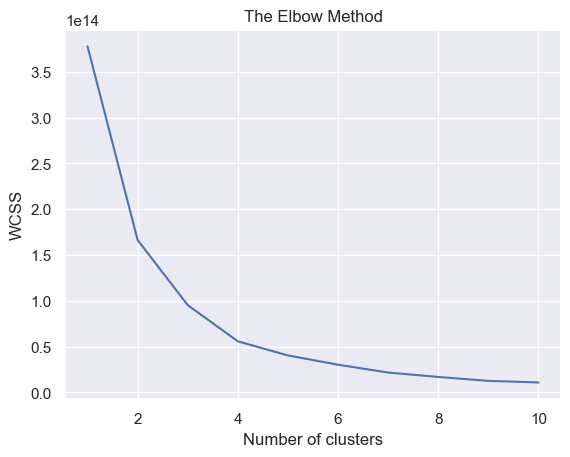

In [189]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()




**Nhận xét**
*Ta thấy chọn số cụm bằng 4 là hợp lý*

In [190]:
clus = 4
kmeans = KMeans(n_clusters=clus).fit(X1)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X1)
print(pred_label)

Centers found by scikit-learn:
[[2.33473906e-01 2.88719030e-01 6.66051661e-01 4.11228255e-01
  1.19552678e+05 2.48344755e+00 3.32888772e+00 1.35635213e+00
  1.28455456e+00 1.00000000e+00 2.37743806e-01 2.99947285e-01
  7.30627306e-02 7.50200316e+00 2.19098577e+00 9.89984186e-01
  4.50162889e+01 5.84876120e+00]
 [4.20040018e-01 4.40511005e-01 6.71309835e-01 4.45051562e-01
  2.15790460e+05 2.39218101e+00 2.98060643e+00 1.39341234e+00
  1.27889795e+00 1.00000000e+00 2.18254579e-01 2.78051408e-01
  9.64291211e-02 7.42781284e+00 2.19855318e+00 9.90149300e-01
  4.33507003e+01 6.89556718e+00]
 [4.78908189e-01 5.83622829e-01 6.91066998e-01 4.36972705e-01
  3.51301042e+05 2.08188586e+00 2.50024814e+00 1.33920596e+00
  1.29950372e+00 1.00000000e+00 1.90074442e-01 3.09181141e-01
  1.34739454e-01 7.55310174e+00 2.21786600e+00 9.86104218e-01
  4.32923077e+01 7.62605459e+00]
 [4.53563715e-01 6.26349892e-01 7.84017279e-01 5.78833693e-01
  6.87609389e+05 1.82721382e+00 2.07127430e+00 1.37365011e+00
  

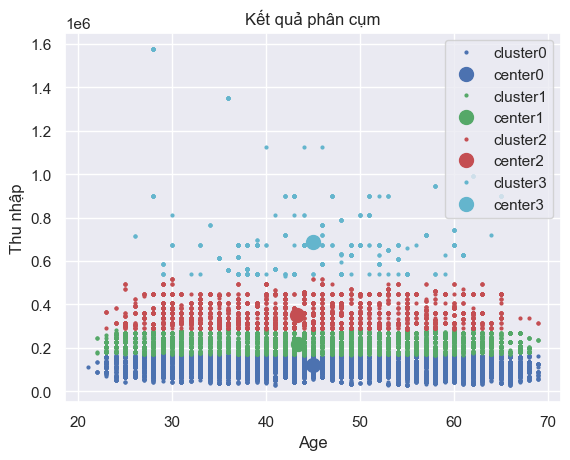

In [191]:
plt.xlabel('Age')
plt.ylabel('Thu nhập')
plt.title('Kết quả phân cụm')
plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
for i in range(clus):
     # lấy dữ liệu của cụm i
    data = X1[pred_label == i]
    # Vẽ cụm i lên đồ thị
    plt.plot(data[:, 16], data[:, 4], plt_colors[i] +'.' , markersize = 4, label = 'cluster' + str(i))
    # Vẽ tâm cụm i lên đồ thị
    plt.plot(kmeans.cluster_centers_[i][16], kmeans.cluster_centers_[i][4] , plt_colors[i] + 'o', markersize = 10, label = 'center' + str(i))
plt.legend() # Hiện bảng chú thích
plt.show()

### Luật kết hợp

In [192]:
!pip install apyori
from apyori import apriori

In [193]:
df1.shape

(36457, 19)

In [194]:
df1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
1,5008805,1,1,1,0,427500.0,4,1,0,4,1,1,0,0,7,2.0,1,33.0,13.0
2,5008806,1,1,1,0,112500.0,4,4,1,1,1,0,0,0,16,2.0,1,59.0,4.0
3,5008808,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
4,5008809,0,0,1,0,270000.0,0,4,3,1,1,0,1,1,14,1.0,1,53.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,1,0,315000.0,4,4,1,1,1,0,0,0,10,2.0,0,48.0,7.0
36453,5149834,0,0,1,0,157500.0,0,1,1,1,1,0,1,1,11,2.0,1,34.0,4.0
36454,5149838,0,0,1,0,157500.0,1,1,1,1,1,0,1,1,11,2.0,1,34.0,4.0
36455,5150049,0,0,1,0,283500.0,4,4,1,1,1,0,0,0,14,2.0,0,50.0,2.0


In [195]:
df2 = pd.read_csv('nhom9.csv')
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,IT staff,2.0,1,33.0,13.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,IT staff,2.0,1,33.0,13.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,1,59.0,4.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,1,53.0,9.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,1,53.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,2.0,0,48.0,7.0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,1,34.0,4.0
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,1,34.0,4.0
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2.0,0,50.0,2.0


In [196]:
# Tiền xử lý dữ liệu
df2['CODE_GENDER'].replace('M','Male', inplace= True)
df2['CODE_GENDER'].replace( 'F', 'Female', inplace= True)

df2['FLAG_OWN_CAR'].replace('Y','Car', inplace= True)
df2['FLAG_OWN_CAR'].replace('N','No Car', inplace= True)


df2['STATUS'].replace(1,'Yes credit card', inplace= True)
df2['STATUS'].replace(0,'No credit card', inplace= True)


In [197]:
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE,YEARS_EMPLOYED
0,5008804,Male,Car,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,IT staff,2.0,Yes credit card,33.0,13.0
1,5008805,Male,Car,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,IT staff,2.0,Yes credit card,33.0,13.0
2,5008806,Male,Car,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,Yes credit card,59.0,4.0
3,5008808,Female,No Car,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,Yes credit card,53.0,9.0
4,5008809,Female,No Car,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,Yes credit card,53.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,Male,Car,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,2.0,No credit card,48.0,7.0
36453,5149834,Female,No Car,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,Yes credit card,34.0,4.0
36454,5149838,Female,No Car,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,Medicine staff,2.0,Yes credit card,34.0,4.0
36455,5150049,Female,No Car,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2.0,No credit card,50.0,2.0


In [198]:
column = ['ID','FLAG_OWN_REALTY','CNT_CHILDREN','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','YEARS_EMPLOYED']
df2 = df2.drop(columns =column )

In [199]:
df2

,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,STATUS,AGE
0,Male,Car,427500.0,Working,Higher education,Civil marriage,Rented apartment,IT staff,Yes credit card,33.0
1,Male,Car,427500.0,Working,Higher education,Civil marriage,Rented apartment,IT staff,Yes credit card,33.0
2,Male,Car,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,Yes credit card,59.0
3,Female,No Car,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,Yes credit card,53.0
4,Female,No Car,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,Yes credit card,53.0
...,...,...,...,...,...,...,...,...,...,...
36452,Male,Car,315000.0,Working,Secondary / secondary special,Married,House / apartment,Managers,No credit card,48.0
36453,Female,No Car,157500.0,Commercial associate,Higher education,Married,House / apartment,Medicine staff,Yes credit card,34.0
36454,Female,No Car,157500.0,Pensioner,Higher education,Married,House / apartment,Medicine staff,Yes credit card,34.0
36455,Female,No Car,283500.0,Working,Secondary / secondary special,Married,House / apartment,Sales staff,No credit card,50.0


In [219]:
df2.shape

(36457, 10)

In [220]:
records = []
for i in range(0, 500):
    records.append([str(df2.values[i, j]) for j in range(1, 10)])


In [221]:
# Hiển thị 5 bản ghi đầu tiên
print(records[0 : 5])

[['Car', '427500.0', 'Working', 'Higher education', 'Civil marriage', 'Rented apartment', 'IT staff', 'Yes credit card', '33.0'], ['Car', '427500.0', 'Working', 'Higher education', 'Civil marriage', 'Rented apartment', 'IT staff', 'Yes credit card', '33.0'], ['Car', '112500.0', 'Working', 'Secondary / secondary special', 'Married', 'House / apartment', 'Security staff', 'Yes credit card', '59.0'], ['No Car', '270000.0', 'Commercial associate', 'Secondary / secondary special', 'Single / not married', 'House / apartment', 'Sales staff', 'Yes credit card', '53.0'], ['No Car', '270000.0', 'Commercial associate', 'Secondary / secondary special', 'Single / not married', 'House / apartment', 'Sales staff', 'Yes credit card', '53.0']]


In [222]:
association_rules = apriori(records, min_support = 0.09, min_confidence = 0.002, min_lift = 3, min_length = 2)

In [223]:
# Đổi các luật về dạng danh sách
association_results = list(association_rules)

**Xem kết quả**

*Xem tổng số luật được tạo ra*

In [224]:
print(len(association_results))

457


*In luật đầu tiên*

In [225]:
print(association_results[0])

RelationRecord(items=frozenset({'43.0', '297000.0'}), support=0.102, ordered_statistics=[OrderedStatistic(items_base=frozenset({'297000.0'}), items_add=frozenset({'43.0'}), confidence=1.0, lift=7.936507936507937), OrderedStatistic(items_base=frozenset({'43.0'}), items_add=frozenset({'297000.0'}), confidence=0.8095238095238094, lift=7.936507936507936)])


*Hiển thị luật, độ hỗ trợ, độ tin cậy và lift cho từng luật theo cách rõ ràng hơn*

In [226]:
for item in association_results:
    #Dòng đầu
    pair = item[0]
    items = [x for x in pair]
    print('Rule: ' + items[0] + " -> " + items[1])

    #Dòng thứ 2 chứa độ hỗ trợ
    print('Support: ' + str(item[1]))

    #Dòng thứ 3
    print('Confidence: ' + str(item[2][0][2]))
    print('Lift: ' + str(item[2][0][3]))
    print('=======================================')

Rule: 43.0 -> 297000.0
Support: 0.102
Confidence: 1.0
Lift: 7.936507936507937
Rule: Commercial associate -> 297000.0
Support: 0.102
Confidence: 1.0
Lift: 3.3783783783783785
Rule: Laborers -> 297000.0
Support: 0.102
Confidence: 1.0
Lift: 3.7878787878787876
Rule: Rented apartment -> 297000.0
Support: 0.102
Confidence: 1.0
Lift: 7.936507936507937
Rule: Single / not married -> 297000.0
Support: 0.102
Confidence: 1.0
Lift: 5.617977528089888
Rule: 43.0 -> Laborers
Support: 0.102
Confidence: 0.8095238095238094
Lift: 3.066378066378066
Rule: 43.0 -> Rented apartment
Support: 0.102
Confidence: 0.8095238095238094
Lift: 6.424792139077852
Rule: 43.0 -> Single / not married
Support: 0.102
Confidence: 0.8095238095238094
Lift: 4.5478865703584805
Rule: IT staff -> Pensioner
Support: 0.112
Confidence: 0.6021505376344086
Lift: 5.376344086021505
Rule: Laborers -> Rented apartment
Support: 0.102
Confidence: 0.3863636363636363
Lift: 3.066378066378066
Rule: Single / not married -> Rented apartment
Support: 0